In [5]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [6]:
#マスーばねーダンパシステムの定義
M = 1.0
D = 5.0
K = 6.0
A = np.array([[0.0, 1.0], [-K/M,-D/M]]) #行列A
b = np.array([[0.0], [1/M]]) #ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd

In [12]:
poles = [-3.0, -3.0] #閉ループシステムの極の指定
f = matlab.acker(A, b, poles) #フィードバックゲインを求める
print("feedback gain =", f) #フィードバックゲインの表示

feedback gain = [[ 3.  1.]]


In [15]:
Af = A - b*f #Af = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてdを零ベクトルとする
sys_s_fbk = matlab.ss(Af, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_fbk, t_s_fbk) = matlab.initial(sys_s_fbk, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

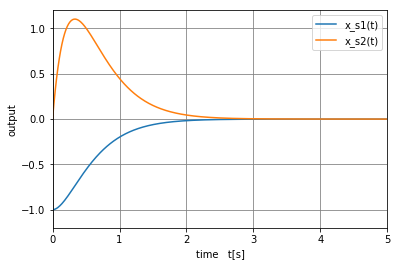

In [16]:
# 図13.5の描画
plt.plot(t_s_fbk, y_s_fbk[:,0], label = "x_s1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_s_fbk, y_s_fbk[:,1], label = "x_s2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 1.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

In [17]:
dd = np.ones((len(t_s_fbk)))#単位ステップ信号で表される外乱
(y_s_fbk_d, t_s_fbk, x) = matlab.lsim(sys_s_fbk, U=-dd, T = arange(0, 5, 0.01), X0 = np.array([[-1.0],[0.0]])) #外乱が入ったシステムの初期値応答

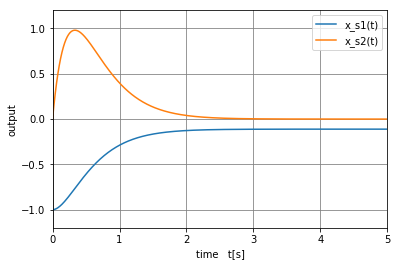

In [18]:
#図13.6
plt.plot(t_s_fbk, x[:,0], label = "x_s1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_s_fbk, x[:,1], label = "x_s2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 1.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示